In [2]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from matplotlib import rc
from scipy.stats import pearsonr
from optimalEmbedding_sampling import run_optEmbedding_sampling
from GCCM_sampling import run_GCCM_sampling
from nobound_diffusionMean import run_versions_
from matplotlib.legend_handler import HandlerLineCollection, HandlerTuple
from matplotlib.ticker import MaxNLocator
import matplotlib.gridspec as gridspec
from diffusion import remove_linear_signals, run_sim, show_patterns
from grid_diffusionMean import run_grid
from plot import get_mean, get_interval, make_Eplot, make_Lplot

%load_ext autoreload
%autoreload 2

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)

In [42]:
size=100
np.random.seed(seed=10)
X_rand = np.random.rand(size, size)
Y_rand = np.random.rand(size, size)

In [58]:
dims = np.arange(1,9)
lib_sizes = np.arange(10,101,30)

In [34]:
#a1 = np.array([2.8e-4, 2.8e-4, 2.8e-4, 2.8e-4, 2.8e-4, 2.8e-4, 2.8e-4, 2.8e-4, 
#      1.4e-4, 0.7e-4, 0.35e-4, 0.175e-4, 0.0875e-4, 0.04375e-4, 0.021875e-4])
#a2 = np.flip(a1)
#a_ratio = a1/a2

In [158]:
c_list = [0,0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 
     0.11, 0.12, 0.13, 0.14]
a1 = np.linspace(2.8e-3, 2.8e-5,15)
a2 = np.flip(a1)
a_list = np.dstack((a1,a2)).squeeze() #np.array(zip(a1,a2))
a_ratio = a1/a2

In [152]:
a_list.shape[1]

15

In [159]:
a_list

array([[2.800e-03, 2.800e-05],
       [2.602e-03, 2.260e-04],
       [2.404e-03, 4.240e-04],
       [2.206e-03, 6.220e-04],
       [2.008e-03, 8.200e-04],
       [1.810e-03, 1.018e-03],
       [1.612e-03, 1.216e-03],
       [1.414e-03, 1.414e-03],
       [1.216e-03, 1.612e-03],
       [1.018e-03, 1.810e-03],
       [8.200e-04, 2.008e-03],
       [6.220e-04, 2.206e-03],
       [4.240e-04, 2.404e-03],
       [2.260e-04, 2.602e-03],
       [2.800e-05, 2.800e-03]])

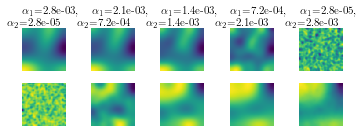

In [46]:
a1_list = np.linspace(2.8e-3, 2.8e-5,5)
a2_list = np.flip(a1_list)

fig, axes = plt.subplots(2,5, figsize=(5, 2))

for i, (a1,a2) in enumerate(zip(a1_list, a2_list)):
    X, Y = run_sim(X_rand, Y_rand, T=30, c=0.1, a1=a1, a2=a2, plot=False)

    ax1 = axes[0, i]
    ax2 = axes[1, i]
                
    show_patterns(X, ax=ax1)
    ax1.set_title(fr'$\alpha_1$={a1:.1e},$\\$ $\alpha_2$={a2:.1e}', fontsize=11)
    show_patterns(Y, ax=ax2)
    
plt.tight_layout()

In [48]:
a_list

array([[[2.800e-03, 2.800e-05],
        [2.602e-03, 2.260e-04],
        [2.404e-03, 4.240e-04],
        [2.206e-03, 6.220e-04],
        [2.008e-03, 8.200e-04],
        [1.810e-03, 1.018e-03],
        [1.612e-03, 1.216e-03],
        [1.414e-03, 1.414e-03],
        [1.216e-03, 1.612e-03],
        [1.018e-03, 1.810e-03],
        [8.200e-04, 2.008e-03],
        [6.220e-04, 2.206e-03],
        [4.240e-04, 2.404e-03],
        [2.260e-04, 2.602e-03],
        [2.800e-05, 2.800e-03]]])

In [54]:
a_ratio.round(2)

array([1.000e+02, 1.151e+01, 5.670e+00, 3.550e+00, 2.450e+00, 1.780e+00,
       1.330e+00, 1.000e+00, 7.500e-01, 5.600e-01, 4.100e-01, 2.800e-01,
       1.800e-01, 9.000e-02, 1.000e-02])

In [150]:
run_GCCM_sampling(X, Y, [100], E=5, cores=6)

x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding


{'x_xmap_y': {100: {'mean': 0.21228987937927668,
   'sig': 9.285726778829329e-06,
   'conf': (0.3040134415292401, 0.11666662050132152)}},
 'y_xmap_x': {100: {'mean': 0.858703123986721,
   'sig': 0.0,
   'conf': (0.8824545383170694, 0.8305843815673117)}}}

# Visualize bounds 1, 0.01, 100

In [55]:
sample=50
c=0.1
a1 = 1.414e-03
a2 = 1.414e-03    

results_diffsame = run_versions_(a1=a1, a2=a2, c=c, sample=sample)

0.001414 0.001414
running with seed 0
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
count  0
running with seed 1
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
count  1
running with seed 2
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
count  2
running with seed 3
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
count  3
running with seed 4
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
count  4
running with seed 5
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
count  5
running with seed 6
x_xmap_y
Constructin

In [56]:
with open('diffusion_results_paper/mean50_c01_t30_diff1.pkl', 'wb') as pickle_file:
    pickle.dump(results_diffsame, pickle_file)

In [116]:
Exy = []
Eyx = []
Lxy = []
Lyx = []
for k in results_diffsame.keys():
    result_E = results_diffsame[k]['optE']
    x_xmap_y, y_xmap_x = get_mean(result_E, dims)
    Exy.append(x_xmap_y)
    Eyx.append(y_xmap_x)
    result_L = results_diffsame[k]['convergence']
    x_xmap_y, y_xmap_x = get_mean(result_L, lib_sizes)
    Lxy.append(x_xmap_y)
    Lyx.append(y_xmap_x)

In [117]:
Ediff_01 = []
Ldiff_01 = []
for k in results_diffsame.keys():
    result_E = results_diffsame[k]['optE']
    x_xmap_y, y_xmap_x = get_mean(result_E, dims)
    Ediff_01.append(y_xmap_x-x_xmap_y)
    result_L = results_diffsame[k]['convergence']
    x_xmap_y, y_xmap_x = get_mean(result_L, lib_sizes)
    Ldiff_01.append(y_xmap_x-x_xmap_y)

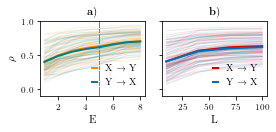

In [121]:
fig, ax = plt.subplots(1,2, figsize=(4,2), sharey=True)

Ex_xmap_y = []
Ey_xmap_x = []
for k in results_diffsame.keys():
    result_E = results_diffsame[k]['optE']
    
    x_xmap_y, y_xmap_x = get_mean(result_E, dims)
    xy_u, xy_l, yx_u, yx_l = get_interval(result_E, dims)

    Ex_xmap_y.append(x_xmap_y)
    Ey_xmap_x.append(y_xmap_x)
    
    ax[0].plot(dims, y_xmap_x,  c='#FB8500', lw=1, label = r'X $\rightarrow$ Y', alpha=0.1)
    #ax[0].fill_between(dims, yx_l, yx_u, color='#FB8500', alpha=0.1, lw=0)
    ax[0].plot(dims, x_xmap_y,  c='#017D84', lw=1, label = r'Y $\rightarrow$ X', alpha=0.1)
    #ax[0].fill_between(dims, xy_l, xy_u, color='#017D84', alpha=0.1, lw=0)
    ax[0].axvline(x=5, color='gray', linestyle='--', linewidth=1, alpha=0.5)

p3,=ax[0].plot(dims, np.array(Ey_xmap_x).mean(axis=0),  c='#FB8500', lw=2, label = r'X $\rightarrow$ Y')
p4,=ax[0].plot(dims, np.array(Ex_xmap_y).mean(axis=0),  c='#017D84', lw=2, label = r'Y $\rightarrow$ X')


ax[0].set_ylim(-0.1,1)
ax[0].set_title(r'$\textbf a)$')
ax[0].set_xlabel('E')
ax[0].xaxis.set_major_locator(MaxNLocator(integer=True, nbins=4))
ax[0].set_ylabel(r'$\rho$')
legend = ax[0].legend([p3, p4], [r'X $\rightarrow$ Y', r'Y $\rightarrow$ X'], scatterpoints=1,
               numpoints=1, markerscale=1., handler_map={tuple: HandlerTuple(ndivide=None, pad=0.7)},
               handlelength=0.5,      frameon=False)
for legobj in legend.legendHandles:
    legobj.set_linewidth(2)

Lx_xmap_y = []
Ly_xmap_x = []

for k in results_diffsame.keys():
    result_L = results_diffsame[k]['convergence']

    x_xmap_y, y_xmap_x = get_mean(result_L, lib_sizes)
    xy_u, xy_l, yx_u, yx_l = get_interval(result_L, lib_sizes)

    Lx_xmap_y.append(x_xmap_y)
    Ly_xmap_x.append(y_xmap_x)
    
    ax[1].plot(lib_sizes, y_xmap_x,  c='#D00000', lw=1, label = r'X $\rightarrow$ Y', alpha=0.1)
    #ax[1].fill_between(lib_sizes, yx_l, yx_u, color='#D00000', alpha=0.1, lw=0)
    ax[1].plot(lib_sizes, x_xmap_y,  c='#006EBC', lw=1, label = r'Y $\rightarrow$ X', alpha=0.1)
    #ax[1].fill_between(lib_sizes, xy_l, xy_u, color='#006EBC', alpha=0.1, lw=0)

p3,=ax[1].plot(lib_sizes, np.array(Ly_xmap_x).mean(axis=0),  c='#D00000', lw=2, label = r'X $\rightarrow$ Y')
p4,=ax[1].plot(lib_sizes, np.array(Lx_xmap_y).mean(axis=0),  c='#006EBC', lw=2, label = r'Y $\rightarrow$ X')

ax[1].set_title(r'$\textbf b)$')
ax[1].set_xlabel('L')
ax[1].xaxis.set_major_locator(MaxNLocator(integer=True, nbins=4))
legend = ax[1].legend([p3, p4], [r'X $\rightarrow$ Y', r'Y $\rightarrow$ X'], scatterpoints=1,
               numpoints=1, markerscale=1., handler_map={tuple: HandlerTuple(ndivide=None, pad=0.7)},
               handlelength=0.5,       frameon=False)
for legobj in legend.legendHandles:
    legobj.set_linewidth(2)

plt.tight_layout()
plt.savefig('plots_paper/mean_c01_1.pdf', bbox_inches='tight')

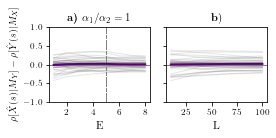

In [122]:
fig, ax = plt.subplots(1,2, figsize=(4,2), sharey=True)

Ediff = []
for k in results_diffsame.keys():
    result_E = results_diffsame[k]['optE']
    
    x_xmap_y, y_xmap_x = get_mean(result_E, dims)
    xy_u, xy_l, yx_u, yx_l = get_interval(result_E, dims)

    Ediff.append(y_xmap_x-x_xmap_y)
    
    ax[0].plot(dims, y_xmap_x-x_xmap_y,  c='grey', lw=1, label = r'X $\rightarrow$ Y', alpha=0.2)
    #ax[0].fill_between(dims, yx_l, yx_u, color='#FB8500', alpha=0.1, lw=0)
    ax[0].axvline(x=5, color='gray', linestyle='--', linewidth=1, alpha=0.5)

ax[0].axhline(y=0, color='gray', linewidth=1)
p3,=ax[0].plot(dims, np.array(Ediff).mean(axis=0),  c='#5e007a', lw=2)

ax[0].set_ylim(-1,1)
ax[0].set_title(r'$\textbf{a)}$ $\alpha_1/\alpha_2=1$')
ax[0].set_xlabel('E')
ax[0].xaxis.set_major_locator(MaxNLocator(integer=True, nbins=4))
ax[0].set_ylabel(r'$ \rho[\hat{X}(s)|M_Y] - \rho[\hat{Y}(s)|M_X]$', fontsize=10)
#legend = ax[0].legend([p3], [r'$\rho[\hat{Y}(s)|M_X] - \rho[\hat{X}(s)|M_Y]$'], scatterpoints=1,
#               numpoints=1, markerscale=1., handler_map={tuple: HandlerTuple(ndivide=None, pad=0.7)},
#                    frameon=False)
for legobj in legend.legendHandles:
    legobj.set_linewidth(2)

Ldiff = []
for k in results_diffsame.keys():
    result_L = results_diffsame[k]['convergence']

    x_xmap_y, y_xmap_x = get_mean(result_L, lib_sizes)
    xy_u, xy_l, yx_u, yx_l = get_interval(result_L, lib_sizes)

    Ldiff.append(y_xmap_x-x_xmap_y)
    
    ax[1].plot(lib_sizes, y_xmap_x-x_xmap_y,  c='grey', lw=1, label = r'X $\rightarrow$ Y', alpha=0.2)
    #ax[1].fill_between(lib_sizes, yx_l, yx_u, color='#D00000', alpha=0.1, lw=0)

ax[1].axhline(y=0, color='gray', linewidth=1)
p3,=ax[1].plot(lib_sizes, np.array(Ldiff).mean(axis=0),  c='#5e007a', lw=2, label = r'X $\rightarrow$ Y')

ax[1].set_title(r'$\textbf b)$')
ax[1].set_xlabel('L')
ax[1].xaxis.set_major_locator(MaxNLocator(integer=True, nbins=4))

for legobj in legend.legendHandles:
    legobj.set_linewidth(2)

plt.tight_layout()
plt.savefig('plots_paper/diff_c01_1.pdf', bbox_inches='tight')

In [63]:
sample=50
c=0.1
a1 = 2.800e-05
a2 = 2.800e-03   

results_diff01 = run_versions_(a1=a1, a2=a2, c=c, sample=sample)

2.8e-05 0.0028
running with seed 0
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
count  0
running with seed 1
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
count  1
running with seed 2
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
count  2
running with seed 3
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
count  3
running with seed 4
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
count  4
running with seed 5
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
count  5
running with seed 6
x_xmap_y
Constructing e

In [64]:
with open('diffusion_results_paper/mean50_c01_t30_diff001.pkl', 'wb') as pickle_file:
    pickle.dump(results_diff01, pickle_file)

In [123]:
Exy = []
Eyx = []
Lxy = []
Lyx = []
for k in results_diff01.keys():
    result_E = results_diff01[k]['optE']
    x_xmap_y, y_xmap_x = get_mean(result_E, dims)
    Exy.append(x_xmap_y)
    Eyx.append(y_xmap_x)
    result_L = results_diff01[k]['convergence']
    x_xmap_y, y_xmap_x = get_mean(result_L, lib_sizes)
    Lxy.append(x_xmap_y)
    Lyx.append(y_xmap_x)

In [124]:
Ediff_01 = []
Ldiff_01 = []
for k in results_diff01.keys():
    result_E = results_diff01[k]['optE']
    x_xmap_y, y_xmap_x = get_mean(result_E, dims)
    Ediff_01.append(y_xmap_x-x_xmap_y)
    result_L = results_diff01[k]['convergence']
    x_xmap_y, y_xmap_x = get_mean(result_L, lib_sizes)
    Ldiff_01.append(y_xmap_x-x_xmap_y)

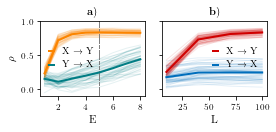

In [125]:
fig, ax = plt.subplots(1,2, figsize=(4,2), sharey=True)

Ex_xmap_y = []
Ey_xmap_x = []
for k in results_diff01.keys():
    result_E = results_diff01[k]['optE']
    
    x_xmap_y, y_xmap_x = get_mean(result_E, dims)
    xy_u, xy_l, yx_u, yx_l = get_interval(result_E, dims)

    Ex_xmap_y.append(x_xmap_y)
    Ey_xmap_x.append(y_xmap_x)
    
    ax[0].plot(dims, y_xmap_x,  c='#FB8500', lw=1, label = r'X $\rightarrow$ Y', alpha=0.1)
    #ax[0].fill_between(dims, yx_l, yx_u, color='#FB8500', alpha=0.1, lw=0)
    ax[0].plot(dims, x_xmap_y,  c='#017D84', lw=1, label = r'Y $\rightarrow$ X', alpha=0.1)
    #ax[0].fill_between(dims, xy_l, xy_u, color='#017D84', alpha=0.1, lw=0)
    ax[0].axvline(x=5, color='gray', linestyle='--', linewidth=1, alpha=0.5)

p3,=ax[0].plot(dims, np.array(Ey_xmap_x).mean(axis=0),  c='#FB8500', lw=2, label = r'X $\rightarrow$ Y')
p4,=ax[0].plot(dims, np.array(Ex_xmap_y).mean(axis=0),  c='#017D84', lw=2, label = r'Y $\rightarrow$ X')


ax[0].set_ylim(-0.1,1)
ax[0].set_title(r'$\textbf a)$')
ax[0].set_xlabel('E')
ax[0].xaxis.set_major_locator(MaxNLocator(integer=True, nbins=4))
ax[0].set_ylabel(r'$\rho$')
legend = ax[0].legend([p3, p4], [r'X $\rightarrow$ Y', r'Y $\rightarrow$ X'], scatterpoints=1,
               numpoints=1, markerscale=1., handler_map={tuple: HandlerTuple(ndivide=None, pad=0.7)},
               handlelength=0.5,     frameon=False)
for legobj in legend.legendHandles:
    legobj.set_linewidth(2)

Lx_xmap_y = []
Ly_xmap_x = []

for k in results_diff01.keys():
    result_L = results_diff01[k]['convergence']

    x_xmap_y, y_xmap_x = get_mean(result_L, lib_sizes)
    xy_u, xy_l, yx_u, yx_l = get_interval(result_L, lib_sizes)

    Lx_xmap_y.append(x_xmap_y)
    Ly_xmap_x.append(y_xmap_x)
    
    ax[1].plot(lib_sizes, y_xmap_x,  c='#D00000', lw=1, label = r'X $\rightarrow$ Y', alpha=0.1)
    #ax[1].fill_between(lib_sizes, yx_l, yx_u, color='#D00000', alpha=0.1, lw=0)
    ax[1].plot(lib_sizes, x_xmap_y,  c='#006EBC', lw=1, label = r'Y $\rightarrow$ X', alpha=0.1)
    #ax[1].fill_between(lib_sizes, xy_l, xy_u, color='#006EBC', alpha=0.1, lw=0)

p3,=ax[1].plot(lib_sizes, np.array(Ly_xmap_x).mean(axis=0),  c='#D00000', lw=2, label = r'X $\rightarrow$ Y')
p4,=ax[1].plot(lib_sizes, np.array(Lx_xmap_y).mean(axis=0),  c='#006EBC', lw=2, label = r'Y $\rightarrow$ X')

ax[1].set_title(r'$\textbf b)$')
ax[1].set_xlabel('L')
ax[1].xaxis.set_major_locator(MaxNLocator(integer=True, nbins=4))
legend = ax[1].legend([p3, p4], [r'X $\rightarrow$ Y', r'Y $\rightarrow$ X'], scatterpoints=1,
               numpoints=1, markerscale=1., handler_map={tuple: HandlerTuple(ndivide=None, pad=0.7)},
               handlelength=0.5,      frameon=False)
for legobj in legend.legendHandles:
    legobj.set_linewidth(2)

plt.tight_layout()
plt.savefig('plots_paper/mean_c01_001.pdf', bbox_inches='tight')

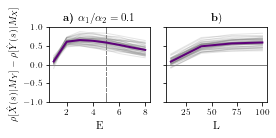

In [126]:
fig, ax = plt.subplots(1,2, figsize=(4,2), sharey=True)

Ediff = []
for k in results_diff01.keys():
    result_E = results_diff01[k]['optE']
    
    x_xmap_y, y_xmap_x = get_mean(result_E, dims)
    xy_u, xy_l, yx_u, yx_l = get_interval(result_E, dims)

    Ediff.append(y_xmap_x-x_xmap_y)
    
    ax[0].plot(dims, y_xmap_x-x_xmap_y,  c='grey', lw=1, label = r'X $\rightarrow$ Y', alpha=0.2)
    #ax[0].fill_between(dims, yx_l, yx_u, color='#FB8500', alpha=0.1, lw=0)
    ax[0].axvline(x=5, color='gray', linestyle='--', linewidth=1, alpha=0.5)

ax[0].axhline(y=0, color='gray', linewidth=1)
p3,=ax[0].plot(dims, np.array(Ediff).mean(axis=0),  c='#5e007a', lw=2)

ax[0].set_ylim(-1,1)
ax[0].set_title(r'$\textbf{a)}$ $\alpha_1/\alpha_2=0.1$')
ax[0].set_xlabel('E')
ax[0].xaxis.set_major_locator(MaxNLocator(integer=True, nbins=4))
ax[0].set_ylabel(r'$ \rho[\hat{X}(s)|M_Y] - \rho[\hat{Y}(s)|M_X]$', fontsize=10)
#legend = ax[0].legend([p3], [r'$\rho[\hat{Y}(s)|M_X] - \rho[\hat{X}(s)|M_Y]$'], scatterpoints=1,
#               numpoints=1, markerscale=1., handler_map={tuple: HandlerTuple(ndivide=None, pad=0.7)},
#                    frameon=False)
for legobj in legend.legendHandles:
    legobj.set_linewidth(2)

Ldiff = []
for k in results_diff01.keys():
    result_L = results_diff01[k]['convergence']

    x_xmap_y, y_xmap_x = get_mean(result_L, lib_sizes)
    xy_u, xy_l, yx_u, yx_l = get_interval(result_L, lib_sizes)

    Ldiff.append(y_xmap_x-x_xmap_y)
    
    ax[1].plot(lib_sizes, y_xmap_x-x_xmap_y,  c='grey', lw=1, label = r'X $\rightarrow$ Y', alpha=0.2)
    #ax[1].fill_between(lib_sizes, yx_l, yx_u, color='#D00000', alpha=0.1, lw=0)

ax[1].axhline(y=0, color='gray', linewidth=1)
p3,=ax[1].plot(lib_sizes, np.array(Ldiff).mean(axis=0),  c='#5e007a', lw=2, label = r'X $\rightarrow$ Y')

ax[1].set_title(r'$\textbf b)$')
ax[1].set_xlabel('L')
ax[1].xaxis.set_major_locator(MaxNLocator(integer=True, nbins=4))


for legobj in legend.legendHandles:
    legobj.set_linewidth(2)

plt.tight_layout()
plt.savefig('plots_paper/diff_c01_001.pdf', bbox_inches='tight')

In [69]:
sample=50
c=0.1
a1 = 2.800e-03
a2 = 2.800e-05   

results_diff10 = run_versions_(a1=a1, a2=a2, c=c, sample=sample)

0.0028 2.8e-05
running with seed 0
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
count  0
running with seed 1
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
count  1
running with seed 2
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
count  2
running with seed 3
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
count  3
running with seed 4
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
count  4
running with seed 5
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding
count  5
running with seed 6
x_xmap_y
Constructing e

In [70]:
with open('diffusion_results_paper/mean50_c01_t30_diff100.pkl', 'wb') as pickle_file:
    pickle.dump(results_diff10, pickle_file)

In [127]:
Exy = []
Eyx = []
Lxy = []
Lyx = []
for k in results_diff10.keys():
    result_E = results_diff10[k]['optE']
    x_xmap_y, y_xmap_x = get_mean(result_E, dims)
    Exy.append(x_xmap_y)
    Eyx.append(y_xmap_x)
    result_L = results_diff10[k]['convergence']
    x_xmap_y, y_xmap_x = get_mean(result_L, lib_sizes)
    Lxy.append(x_xmap_y)
    Lyx.append(y_xmap_x)

In [128]:
Ediff_01 = []
Ldiff_01 = []
for k in results_diff10.keys():
    result_E = results_diff10[k]['optE']
    x_xmap_y, y_xmap_x = get_mean(result_E, dims)
    Ediff_01.append(y_xmap_x-x_xmap_y)
    result_L = results_diff10[k]['convergence']
    x_xmap_y, y_xmap_x = get_mean(result_L, lib_sizes)
    Ldiff_01.append(y_xmap_x-x_xmap_y)

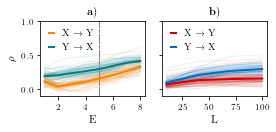

In [129]:
fig, ax = plt.subplots(1,2, figsize=(4,2), sharey=True)

Ex_xmap_y = []
Ey_xmap_x = []
for k in results_diff10.keys():
    result_E = results_diff10[k]['optE']
    
    x_xmap_y, y_xmap_x = get_mean(result_E, dims)
    xy_u, xy_l, yx_u, yx_l = get_interval(result_E, dims)

    Ex_xmap_y.append(x_xmap_y)
    Ey_xmap_x.append(y_xmap_x)
    
    ax[0].plot(dims, y_xmap_x,  c='#FB8500', lw=1, label = r'X $\rightarrow$ Y', alpha=0.1)
    #ax[0].fill_between(dims, yx_l, yx_u, color='#FB8500', alpha=0.1, lw=0)
    ax[0].plot(dims, x_xmap_y,  c='#017D84', lw=1, label = r'Y $\rightarrow$ X', alpha=0.1)
    #ax[0].fill_between(dims, xy_l, xy_u, color='#017D84', alpha=0.1, lw=0)
    ax[0].axvline(x=5, color='gray', linestyle='--', linewidth=1, alpha=0.5)

p3,=ax[0].plot(dims, np.array(Ey_xmap_x).mean(axis=0),  c='#FB8500', lw=2, label = r'X $\rightarrow$ Y')
p4,=ax[0].plot(dims, np.array(Ex_xmap_y).mean(axis=0),  c='#017D84', lw=2, label = r'Y $\rightarrow$ X')


ax[0].set_ylim(-0.1,1)
ax[0].set_title(r'$\textbf a)$')
ax[0].set_xlabel('E')
ax[0].xaxis.set_major_locator(MaxNLocator(integer=True, nbins=4))
ax[0].set_ylabel(r'$\rho$')
legend = ax[0].legend([p3, p4], [r'X $\rightarrow$ Y', r'Y $\rightarrow$ X'], scatterpoints=1,
               numpoints=1, markerscale=1., handler_map={tuple: HandlerTuple(ndivide=None, pad=0.7)},
               handlelength=0.5,     frameon=False)
for legobj in legend.legendHandles:
    legobj.set_linewidth(2)

Lx_xmap_y = []
Ly_xmap_x = []

for k in results_diff10.keys():
    result_L = results_diff10[k]['convergence']

    x_xmap_y, y_xmap_x = get_mean(result_L, lib_sizes)
    xy_u, xy_l, yx_u, yx_l = get_interval(result_L, lib_sizes)

    Lx_xmap_y.append(x_xmap_y)
    Ly_xmap_x.append(y_xmap_x)
    
    ax[1].plot(lib_sizes, y_xmap_x,  c='#D00000', lw=1, label = r'X $\rightarrow$ Y', alpha=0.1)
    #ax[1].fill_between(lib_sizes, yx_l, yx_u, color='#D00000', alpha=0.1, lw=0)
    ax[1].plot(lib_sizes, x_xmap_y,  c='#006EBC', lw=1, label = r'Y $\rightarrow$ X', alpha=0.1)
    #ax[1].fill_between(lib_sizes, xy_l, xy_u, color='#006EBC', alpha=0.1, lw=0)

p3,=ax[1].plot(lib_sizes, np.array(Ly_xmap_x).mean(axis=0),  c='#D00000', lw=2, label = r'X $\rightarrow$ Y')
p4,=ax[1].plot(lib_sizes, np.array(Lx_xmap_y).mean(axis=0),  c='#006EBC', lw=2, label = r'Y $\rightarrow$ X')

ax[1].set_title(r'$\textbf b)$')
ax[1].set_xlabel('L')
ax[1].xaxis.set_major_locator(MaxNLocator(integer=True, nbins=4))
legend = ax[1].legend([p3, p4], [r'X $\rightarrow$ Y', r'Y $\rightarrow$ X'], scatterpoints=1,
               numpoints=1, markerscale=1., handler_map={tuple: HandlerTuple(ndivide=None, pad=0.7)},
               handlelength=0.5,      frameon=False)
for legobj in legend.legendHandles:
    legobj.set_linewidth(2)

plt.tight_layout()
plt.savefig('plots_paper/mean_c01_100.pdf', bbox_inches='tight')

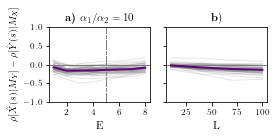

In [130]:
fig, ax = plt.subplots(1,2, figsize=(4,2), sharey=True)

Ediff = []
for k in results_diff10.keys():
    result_E = results_diff10[k]['optE']
    
    x_xmap_y, y_xmap_x = get_mean(result_E, dims)
    xy_u, xy_l, yx_u, yx_l = get_interval(result_E, dims)

    Ediff.append(y_xmap_x-x_xmap_y)
    
    ax[0].plot(dims, y_xmap_x-x_xmap_y,  c='grey', lw=1, label = r'X $\rightarrow$ Y', alpha=0.2)
    #ax[0].fill_between(dims, yx_l, yx_u, color='#FB8500', alpha=0.1, lw=0)
    ax[0].axvline(x=5, color='gray', linestyle='--', linewidth=1, alpha=0.5)

ax[0].axhline(y=0, color='gray', linewidth=1)
p3,=ax[0].plot(dims, np.array(Ediff).mean(axis=0),  c='#5e007a', lw=2)

ax[0].set_ylim(-1,1)
ax[0].set_title(r'$\textbf{a)}$ $\alpha_1/\alpha_2=10$')
ax[0].set_xlabel('E')
ax[0].xaxis.set_major_locator(MaxNLocator(integer=True, nbins=4))
ax[0].set_ylabel(r'$ \rho[\hat{X}(s)|M_Y] - \rho[\hat{Y}(s)|M_X]$', fontsize=10)
#legend = ax[0].legend([p3], [r'$\rho[\hat{Y}(s)|M_X] - \rho[\hat{X}(s)|M_Y]$'], scatterpoints=1,
#               numpoints=1, markerscale=1., handler_map={tuple: HandlerTuple(ndivide=None, pad=0.7)},
#                    frameon=False)
for legobj in legend.legendHandles:
    legobj.set_linewidth(2)

Ldiff = []
for k in results_diff10.keys():
    result_L = results_diff10[k]['convergence']

    x_xmap_y, y_xmap_x = get_mean(result_L, lib_sizes)
    xy_u, xy_l, yx_u, yx_l = get_interval(result_L, lib_sizes)

    Ldiff.append(y_xmap_x-x_xmap_y)
    
    ax[1].plot(lib_sizes, y_xmap_x-x_xmap_y,  c='grey', lw=1, label = r'X $\rightarrow$ Y', alpha=0.2)
    #ax[1].fill_between(lib_sizes, yx_l, yx_u, color='#D00000', alpha=0.1, lw=0)

ax[1].axhline(y=0, color='gray', linewidth=1)
p3,=ax[1].plot(lib_sizes, np.array(Ldiff).mean(axis=0),  c='#5e007a', lw=2, label = r'X $\rightarrow$ Y')

ax[1].set_title(r'$\textbf b)$')
ax[1].set_xlabel('L')
ax[1].xaxis.set_major_locator(MaxNLocator(integer=True, nbins=4))


for legobj in legend.legendHandles:
    legobj.set_linewidth(2)

plt.tight_layout()
plt.savefig('plots_paper/diff_c01_100.pdf', bbox_inches='tight')

In [145]:
with open('diffusion_results_paper/plot/mean50_c01_t30_diff1.pkl', 'rb') as pickle_file:
    results_diff = pickle.load(pickle_file)

In [115]:
results_diff

{0: {'corr': [-0.09064245538487146, 1.0678242322585969e-19],
  'optE': {'x_xmap_y': {1: {'mean': 0.4015601675921241,
     'sig': 0.0,
     'conf': (0.4806855361246807, 0.31594849810399805)},
    2: {'mean': 0.47880769393192874,
     'sig': 0.0,
     'conf': (0.550991509623347, 0.3995122420287442)},
    3: {'mean': 0.6023861935426056,
     'sig': 0.0,
     'conf': (0.6613738645521596, 0.5359928952988514)},
    4: {'mean': 0.6605537960414813,
     'sig': 0.0,
     'conf': (0.7124605598771292, 0.6014575402632301)},
    5: {'mean': 0.6995685084627249,
     'sig': 0.0,
     'conf': (0.7464203489540019, 0.6458158108060169)},
    6: {'mean': 0.7586951892164767,
     'sig': 0.0,
     'conf': (0.7974253465343439, 0.7137395294749096)},
    7: {'mean': 0.7890708447515794,
     'sig': 0.0,
     'conf': (0.8234151383807575, 0.7489664765134464)},
    8: {'mean': 0.8100974631949569,
     'sig': 0.0,
     'conf': (0.8413217749463582, 0.7734847589323997)}},
   'y_xmap_x': {1: {'mean': 0.065129126142955

In [146]:
Exy = []
Eyx = []
Lxy = []
Lyx = []
for k in results_diff.keys():
    result_E = results_diff[k]['optE']
    x_xmap_y, y_xmap_x = get_mean(result_E, dims)
    Exy.append(x_xmap_y)
    Eyx.append(y_xmap_x)
    result_L = results_diff[k]['convergence']
    x_xmap_y, y_xmap_x = get_mean(result_L, lib_sizes)
    Lxy.append(x_xmap_y)
    Lyx.append(y_xmap_x)

In [147]:
Ediff_01 = []
Ldiff_01 = []
for k in results_diff.keys():
    result_E = results_diff[k]['optE']
    x_xmap_y, y_xmap_x = get_mean(result_E, dims)
    Ediff_01.append(y_xmap_x-x_xmap_y)
    result_L = results_diff[k]['convergence']
    x_xmap_y, y_xmap_x = get_mean(result_L, lib_sizes)
    Ldiff_01.append(y_xmap_x-x_xmap_y)

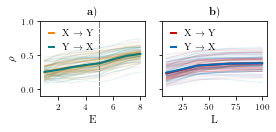

In [148]:
fig, ax = plt.subplots(1,2, figsize=(4,2), sharey=True)

Ex_xmap_y = []
Ey_xmap_x = []
for k in results_diff.keys():
    result_E = results_diff[k]['optE']
    
    x_xmap_y, y_xmap_x = get_mean(result_E, dims)
    xy_u, xy_l, yx_u, yx_l = get_interval(result_E, dims)

    Ex_xmap_y.append(x_xmap_y)
    Ey_xmap_x.append(y_xmap_x)
    
    ax[0].plot(dims, y_xmap_x,  c='#FB8500', lw=1, label = r'X $\rightarrow$ Y', alpha=0.1)
    #ax[0].fill_between(dims, yx_l, yx_u, color='#FB8500', alpha=0.1, lw=0)
    ax[0].plot(dims, x_xmap_y,  c='#017D84', lw=1, label = r'Y $\rightarrow$ X', alpha=0.1)
    #ax[0].fill_between(dims, xy_l, xy_u, color='#017D84', alpha=0.1, lw=0)
    ax[0].axvline(x=5, color='gray', linestyle='--', linewidth=1, alpha=0.5)

p3,=ax[0].plot(dims, np.array(Ey_xmap_x).mean(axis=0),  c='#FB8500', lw=2, label = r'X $\rightarrow$ Y')
p4,=ax[0].plot(dims, np.array(Ex_xmap_y).mean(axis=0),  c='#017D84', lw=2, label = r'Y $\rightarrow$ X')


ax[0].set_ylim(-0.1,1)
ax[0].set_title(r'$\textbf a)$')
ax[0].set_xlabel('E')
ax[0].xaxis.set_major_locator(MaxNLocator(integer=True, nbins=4))
ax[0].set_ylabel(r'$\rho$')
legend = ax[0].legend([p3, p4], [r'X $\rightarrow$ Y', r'Y $\rightarrow$ X'], scatterpoints=1,
               numpoints=1, markerscale=1., handler_map={tuple: HandlerTuple(ndivide=None, pad=0.7)},
               handlelength=0.5,     frameon=False)
for legobj in legend.legendHandles:
    legobj.set_linewidth(2)

Lx_xmap_y = []
Ly_xmap_x = []

for k in results_diff.keys():
    result_L = results_diff[k]['convergence']

    x_xmap_y, y_xmap_x = get_mean(result_L, lib_sizes)
    xy_u, xy_l, yx_u, yx_l = get_interval(result_L, lib_sizes)

    Lx_xmap_y.append(x_xmap_y)
    Ly_xmap_x.append(y_xmap_x)
    
    ax[1].plot(lib_sizes, y_xmap_x,  c='#D00000', lw=1, label = r'X $\rightarrow$ Y', alpha=0.1)
    #ax[1].fill_between(lib_sizes, yx_l, yx_u, color='#D00000', alpha=0.1, lw=0)
    ax[1].plot(lib_sizes, x_xmap_y,  c='#006EBC', lw=1, label = r'Y $\rightarrow$ X', alpha=0.1)
    #ax[1].fill_between(lib_sizes, xy_l, xy_u, color='#006EBC', alpha=0.1, lw=0)

p3,=ax[1].plot(lib_sizes, np.array(Ly_xmap_x).mean(axis=0),  c='#D00000', lw=2, label = r'X $\rightarrow$ Y')
p4,=ax[1].plot(lib_sizes, np.array(Lx_xmap_y).mean(axis=0),  c='#006EBC', lw=2, label = r'Y $\rightarrow$ X')

ax[1].set_title(r'$\textbf b)$')
ax[1].set_xlabel('L')
ax[1].xaxis.set_major_locator(MaxNLocator(integer=True, nbins=4))
legend = ax[1].legend([p3, p4], [r'X $\rightarrow$ Y', r'Y $\rightarrow$ X'], scatterpoints=1,
               numpoints=1, markerscale=1., handler_map={tuple: HandlerTuple(ndivide=None, pad=0.7)},
               handlelength=0.5,      frameon=False)
for legobj in legend.legendHandles:
    legobj.set_linewidth(2)

plt.tight_layout()
plt.savefig('plots_paper/mean_c01_1_ori.pdf', bbox_inches='tight')

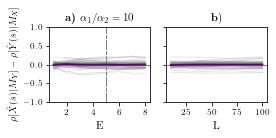

In [149]:
fig, ax = plt.subplots(1,2, figsize=(4,2), sharey=True)

Ediff = []
for k in results_diff.keys():
    result_E = results_diff[k]['optE']
    
    x_xmap_y, y_xmap_x = get_mean(result_E, dims)
    xy_u, xy_l, yx_u, yx_l = get_interval(result_E, dims)

    Ediff.append(y_xmap_x-x_xmap_y)
    
    ax[0].plot(dims, y_xmap_x-x_xmap_y,  c='grey', lw=1, label = r'X $\rightarrow$ Y', alpha=0.2)
    #ax[0].fill_between(dims, yx_l, yx_u, color='#FB8500', alpha=0.1, lw=0)
    ax[0].axvline(x=5, color='gray', linestyle='--', linewidth=1, alpha=0.5)

ax[0].axhline(y=0, color='gray', linewidth=1)
p3,=ax[0].plot(dims, np.array(Ediff).mean(axis=0),  c='#5e007a', lw=2)

ax[0].set_ylim(-1,1)
ax[0].set_title(r'$\textbf{a)}$ $\alpha_1/\alpha_2=10$')
ax[0].set_xlabel('E')
ax[0].xaxis.set_major_locator(MaxNLocator(integer=True, nbins=4))
ax[0].set_ylabel(r'$ \rho[\hat{X}(s)|M_Y] - \rho[\hat{Y}(s)|M_X]$', fontsize=10)
#legend = ax[0].legend([p3], [r'$\rho[\hat{Y}(s)|M_X] - \rho[\hat{X}(s)|M_Y]$'], scatterpoints=1,
#               numpoints=1, markerscale=1., handler_map={tuple: HandlerTuple(ndivide=None, pad=0.7)},
#                    frameon=False)
for legobj in legend.legendHandles:
    legobj.set_linewidth(2)

Ldiff = []
for k in results_diff.keys():
    result_L = results_diff[k]['convergence']

    x_xmap_y, y_xmap_x = get_mean(result_L, lib_sizes)
    xy_u, xy_l, yx_u, yx_l = get_interval(result_L, lib_sizes)

    Ldiff.append(y_xmap_x-x_xmap_y)
    
    ax[1].plot(lib_sizes, y_xmap_x-x_xmap_y,  c='grey', lw=1, label = r'X $\rightarrow$ Y', alpha=0.2)
    #ax[1].fill_between(lib_sizes, yx_l, yx_u, color='#D00000', alpha=0.1, lw=0)

ax[1].axhline(y=0, color='gray', linewidth=1)
p3,=ax[1].plot(lib_sizes, np.array(Ldiff).mean(axis=0),  c='#5e007a', lw=2, label = r'X $\rightarrow$ Y')

ax[1].set_title(r'$\textbf b)$')
ax[1].set_xlabel('L')
ax[1].xaxis.set_major_locator(MaxNLocator(integer=True, nbins=4))

for legobj in legend.legendHandles:
    legobj.set_linewidth(2)

plt.tight_layout()
plt.savefig('plots_paper/diff_c01_1_ori.pdf', bbox_inches='tight')

## Heatmap

In [ ]:
diff_mean = []
for c in c_list:
    for (a1, a2) in a_list:
        filename = 'diffusion_results_paper/c'+c+_'a1'+a1+'_a2'+a2+'.pkl'
        with open(filename, 'rb') as pickle_file:
        results = pickle.load(pickle_file)
        diff = []
        for k in results_diff10.keys():
            gccm_result = results[k]['convergence']
            x_xmap_y, y_xmap_x = get_mean(gccm_result, [100])
            diff.append(y_xmap_x-x_xmap_y)
        diff_mean.append(np.array(diff).mean(axis=0))

In [6]:
run_grid()

running with c=running with c=running with c=running with c=running with c=running with c=running with c=      0 running with c=0.020.010.0200.01     0.03and a=and a=0.03    and a= and a=0.0010179999999999998and a=  and a= and a= 0.002404  0.000820.00280.0012159999999999999 and a=0.00181  0.002206  
0.002602 0.00062199999999999972.8e-050.0004239999999999999running with c= 0.001612

 0.002008 0.000225999999999999640.0006219999999999997
 running with c=running with c=0.01

 running with c=0.002206 
running with c=
0.02running with c=0running with c=running with c=        and a=0.030.03and a=00.010.02and a=        and a=0.002602and a=0.0022060.00082and a= and a=and a=     0.00022599999999999964 0.0004239999999999999 0.0020080.0020080.00062199999999999970.0024040.0006219999999999997 0.0010179999999999998 

 
 0.0024040.00082 0.00181running with c=running with c=

0.0022060.0004239999999999999running with c=running with c= 
running with c= 

 0.010.02running with c= running with c= 0.030.03